<a href="https://colab.research.google.com/github/novoa123/MachineLearningS09/blob/main/S09-Support-Vector-Machines/S09_LAB_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio de Máquinas de Soporte Vectorial en Python

## Objetivo
El objetivo de este laboratorio es experimentar con un conjunto de datos artificial que sigue una distribución Gaussiana creada por el programador. Utilizaremos el kernel Gaussiano para aprender la estructura utilizando máquinas de Soporte Vectorial.


## Etapas Metodológicas

Se deben seguir las siguientes cinco etapas metodológicas:

1. **Obtención de datos**: Generar un conjunto de datos artificial siguiendo una distribución Gaussiana.

2. **Manipulación**: Dividir el conjunto de datos en conjuntos de entrenamiento, prueba y validación.

3. **Exploración**: Visualizar los datos para entender la distribución y la relación entre las categorías.

4. **Modelamiento**: Implementar un clasificador de Máquinas de Soporte Vectorial utilizando el kernel Gaussiano.

5. **Interpretación**: Analizar y discutir los resultados obtenidos, incluyendo las estadísticas de clasificación y los parámetros ajustados.

## Instrucciones

1. Crea un Jupyter notebook para llevar a cabo el laboratorio.

2. Genera un conjunto de datos artificial que siga una distribución Gaussiana concéntrica.

3. Divide el conjunto de datos en conjuntos de entrenamiento, prueba y validación.

4. Grafica los conjuntos de datos, asignando el color rojo a una categoría y el color azul a la otra.

5. Entrena un clasificador de Máquinas de Soporte Vectorial utilizando el kernel Gaussiano.

6. Muestra las estadísticas de clasificación (precisión, recall, F1-score, etc.).

7. Realiza ajustes en los parámetros del clasificador y documenta los cambios en el rendimiento.

8. Interpreta los resultados y concluye sobre la eficacia del modelo.

9. Entrega el Jupyter notebook con todos los pasos y explicaciones detalladas.

Recuerda documentar cada paso y proporcionar explicaciones claras y concisas en tu notebook. ¡Buena suerte!



#PASO 1 Obtención de datos

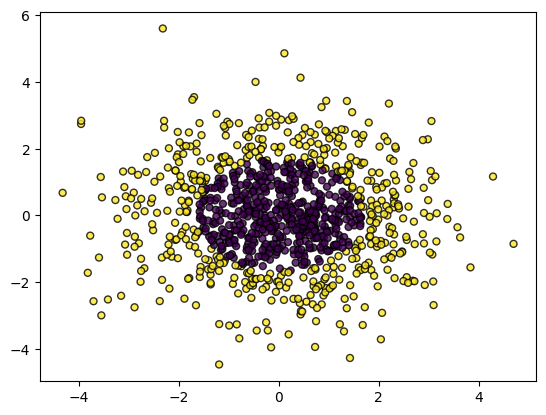

In [5]:
#create two gaussian distributions using make_gaussian_quantiles

from sklearn.datasets import make_gaussian_quantiles
import matplotlib.pyplot as plt
import numpy as np

#generate 2D normally distributed data
X1, Y1 = make_gaussian_quantiles(cov=2.,
                                    n_samples=1000, n_features=2,
                                    n_classes=2, random_state=1)

# plot  data. Seaborn, blue a red color, transparency.

plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k', alpha=0.8)
plt.show()

# PASO 2: Manipulación de datos


In [1]:
from sklearn.model_selection import train_test_split


In [7]:
#Dividir conjunto en datos de entrenamiento y de prueba

X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.3, random_state=42)

#Dividir conjunto en datos de prueba y de validación

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

#PASO 3: Exploración de Datos

In [8]:
import matplotlib.pyplot as plt

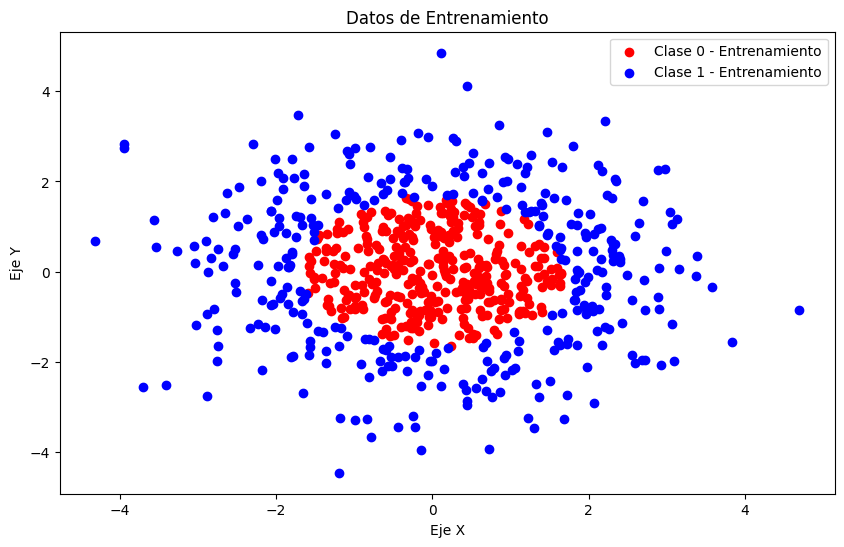

In [9]:
#Visualización datos de entrenamiento

plt.figure(figsize=(10, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Clase 0 - Entrenamiento')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label='Clase 1 - Entrenamiento')

plt.title('Datos de Entrenamiento')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.legend()
plt.show()

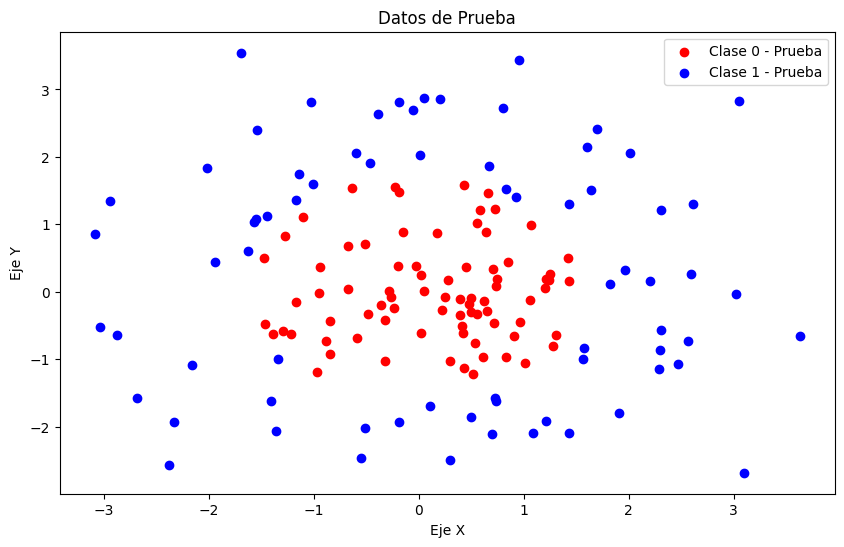

In [10]:
#Visualización datos de prueba

plt.figure(figsize=(10, 6))
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='red', label='Clase 0 - Prueba')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='blue', label='Clase 1 - Prueba')

plt.title('Datos de Prueba')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.legend()
plt.show()

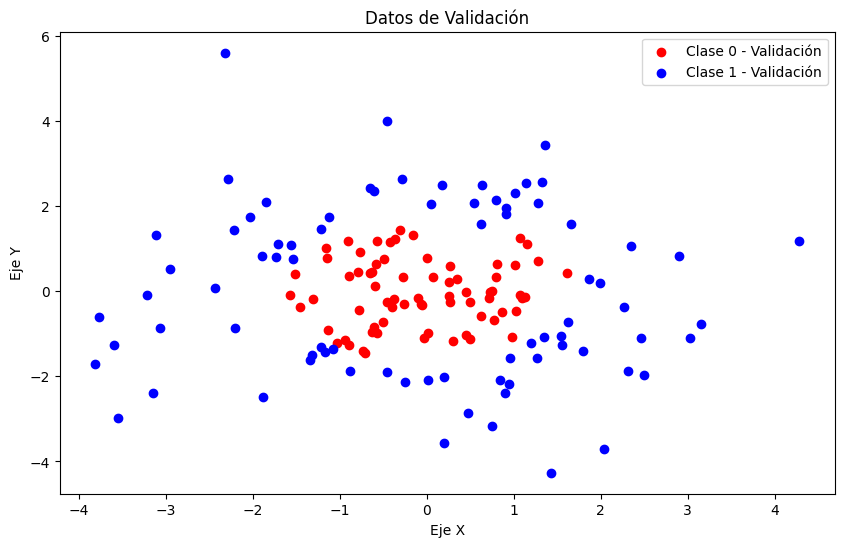

In [11]:
#Visualización datos de validación

plt.figure(figsize=(10, 6))
plt.scatter(X_val[y_val == 0][:, 0], X_val[y_val == 0][:, 1], color='red', label='Clase 0 - Validación')
plt.scatter(X_val[y_val == 1][:, 0], X_val[y_val == 1][:, 1], color='blue', label='Clase 1 - Validación')

plt.title('Datos de Validación')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.legend()
plt.show()

# PASO 4: Modelamiento de Datos (Machine Learning)

In [12]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [13]:
#Entrenamiento del clasificador SVM

svm_model = SVC(kernel='rbf', gamma='scale')
svm_model.fit(X_train, y_train)


SVC()

In [14]:
#Predicciones en conjunto de prueba
y_pred_test = svm_model.predict(X_test)

In [15]:
print('Estadísticas de Clasificación para el Conjunto de Prueba:')
print(classification_report(y_test, y_pred_test))

Estadísticas de Clasificación para el Conjunto de Prueba:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        79
           1       1.00      0.99      0.99        71

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150



In [16]:
#Ajuste de parametros

svm_model_ajusted = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model_ajusted.fit(X_train, y_train)

SVC()

In [17]:
y_pred_val = svm_model_ajusted.predict(X_val)

In [18]:
print('Estadísticas de Clasificación para el Conjunto de Validación (Modelo Ajustado):')
print(classification_report(y_val, y_pred_val))

Estadísticas de Clasificación para el Conjunto de Validación (Modelo Ajustado):
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.97      0.97      0.97        79

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



#PASO 5: Interpretación de los Resultados

Inicialmente, el modelo funciona de manera correcta. Para la clase 0 tiene una precision del 99%, y para la clase 1 del 100%, es decir, comete muy pocos o ningun error en esto.

Al ajustar el modelo, el rendimiento disminuye un poco, presentado precisión del 97% para ambas clases, lo cual si bien sigue siendo positivo, disminuyó en precisión comparando a previo el ajuste.

Ambos modelos resultan ser muy competentes, pero el cambio en el modelo ajustado se puede deber a un sobreajuste, o a que los cambios no beneficiaron bien la capacidad de generalización del modelo. Si bien ajustar el modelo es una practica estandar para mejorarlo, en este caso no fue óptimo.